In [131]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from ser import SER

sns.set(style="white", font_scale=1.5)

### Build a random adjacency matrix (weighted and directed)

In [155]:
n_nodes = 50
adj_mat = np.random.uniform(low=0, high=1, size=(n_nodes, n_nodes))
adj_mat[np.random.random(adj_mat.shape) < .9] = 0  # make sparser

Take a quick look a the connectivity matrix

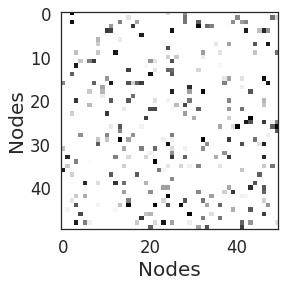

In [156]:
plt.figure(figsize=(4, 4))
plt.imshow(adj_mat, cmap="Greys")
plt.xlabel("Nodes", fontsize=20)
plt.ylabel("Nodes", fontsize=20);

### Instantiate SER model once, use as many times as we want 

In [157]:
ser_model = SER(n_steps=500, prop_e=.1, prop_s=.4, threshold=.4, prob_recovery=.2, prob_spont_act=.001)

Run activity. The output is a matrix (node vs time).

In [158]:
activity = ser_model.run(adj_mat=adj_mat)

Plot the activity matrix and the global activity level

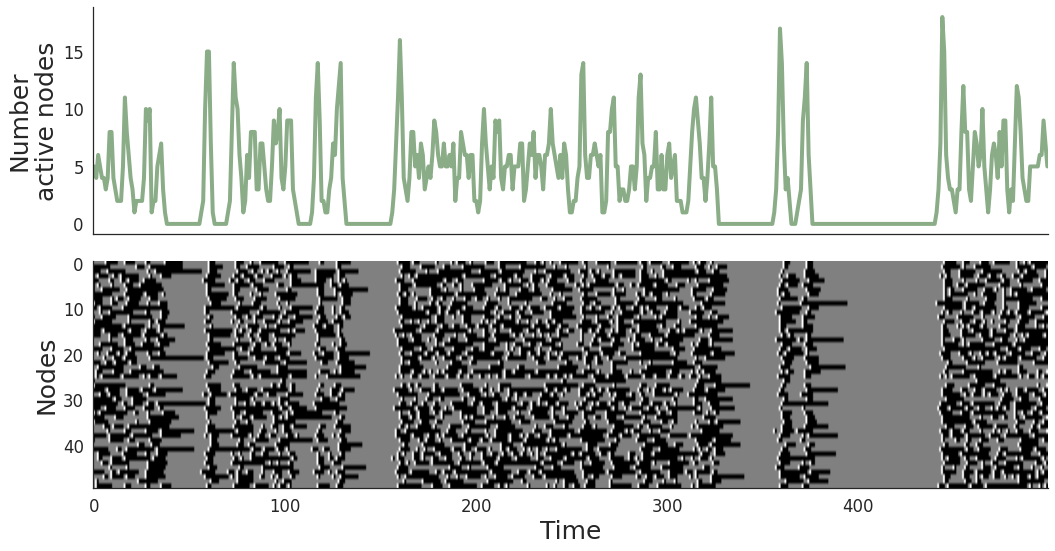

In [167]:
activity_only_active = activity.copy()
activity_only_active[activity == -1] = 0
n_active_nodes = activity_only_active.sum(axis=0)

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(15, 8), sharex=True)


ax1.plot(n_active_nodes, linewidth=4, color="#6D996A", alpha=.8)
ax1.set_ylabel("Number\nactive nodes", fontsize=25)
ax2.imshow(activity, cmap="binary_r")
ax2.set_xlabel("Time", fontsize=25)
ax2.set_ylabel("Nodes", fontsize=25)
ax2.set_aspect("auto")
ax2.grid(False)
sns.despine()
fig.tight_layout()
fig.savefig("basic-example")